# Model Training



In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
import warnings


In [22]:
#loading data
df = pd.read_csv('personality_dataset.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.00,No,4.00,6.00,No,13.00,5.00,Extrovert
1,9.00,Yes,0.00,0.00,Yes,0.00,3.00,Introvert
2,9.00,Yes,1.00,2.00,Yes,5.00,2.00,Introvert
3,0.00,No,6.00,7.00,No,14.00,8.00,Extrovert
4,3.00,No,9.00,4.00,No,8.00,5.00,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.00,No,7.00,6.00,No,6.00,6.00,Extrovert
2896,3.00,No,8.00,3.00,No,14.00,9.00,Extrovert
2897,4.00,Yes,1.00,1.00,Yes,4.00,0.00,Introvert
2898,11.00,Yes,1.00,NaN,Yes,2.00,0.00,Introvert


In [6]:
# loading first five rows of dataset
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.00,No,4.00,6.00,No,13.00,5.00,Extrovert
1,9.00,Yes,0.00,0.00,Yes,0.00,3.00,Introvert
2,9.00,Yes,1.00,2.00,Yes,5.00,2.00,Introvert
3,0.00,No,6.00,7.00,No,14.00,8.00,Extrovert
4,3.00,No,9.00,4.00,No,8.00,5.00,Extrovert


In [7]:
# checking data with missing values
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [8]:
# checking percentage of missing values from total dataset
missing_percentage = df.isnull().mean() * 100
missing_percentage

Time_spent_Alone            2.17
Stage_fear                  2.52
Social_event_attendance     2.14
Going_outside               2.28
Drained_after_socializing   1.79
Friends_circle_size         2.66
Post_frequency              2.24
Personality                 0.00
dtype: float64

In [9]:
# selecting numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != object]
#selecting categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == object]

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 5 numerical features : ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

We have 3 categorical features : ['Stage_fear', 'Drained_after_socializing', 'Personality']


In [10]:
#handle missing values
# Fill numerical columns with median
for col in ['Time_spent_Alone', 'Social_event_attendance', 
            'Going_outside', 'Friends_circle_size', 'Post_frequency']:
    df[col].fillna(df[col].median(), inplace=True)

# Fill Personality column if it's categorical
if df['Personality'].dtype == 'object':
    df['Personality'].fillna(df['Personality'].mode()[0], inplace=True)



In [11]:

for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
#checking do missing values still exist
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [13]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.00,No,4.00,6.00,No,13.00,5.00,Extrovert
1,9.00,Yes,0.00,0.00,Yes,0.00,3.00,Introvert
2,9.00,Yes,1.00,2.00,Yes,5.00,2.00,Introvert
3,0.00,No,6.00,7.00,No,14.00,8.00,Extrovert
4,3.00,No,9.00,4.00,No,8.00,5.00,Extrovert


In [14]:
# Encode the target variable
df['Personality_encoded'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

# Encode Drained_after_socializing
df['Encoded_Drained_after_socializing'] = df['Drained_after_socializing'].map({'No': 0, 'Yes': 1})

#  Feature engineering
df['Social_engagement'] = df['Social_event_attendance'] + df['Friends_circle_size']
df['Isolation_score'] = df['Time_spent_Alone'] + df['Encoded_Drained_after_socializing']

# . Select features and target
features = ['Time_spent_Alone', 'Friends_circle_size', 'Social_event_attendance',
            'Social_engagement', 'Isolation_score']
X = df[features]
y = df['Personality_encoded']

In [15]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape,X_test.shape

((2320, 5), (580, 5))

### create an evaluate function to give all metrics after model training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
# scale feature 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
from tqdm import tqdm
tqdm.pandas(disable=True)

In [20]:
# LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, prediction = clf.fit(X_train, X_test,y_train,y_test)

# Show results
models.head()

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1193, number of negative: 1127
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 2320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514224 -> initscore=0.056912
[LightGBM] [Info] Start training from score 0.056912


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.92,0.92,0.92,0.92,0.32
LGBMClassifier,0.92,0.92,0.92,0.92,0.17
LabelSpreading,0.92,0.92,0.92,0.92,0.49
SVC,0.92,0.92,0.92,0.92,0.17
LogisticRegression,0.92,0.92,0.92,0.92,0.03


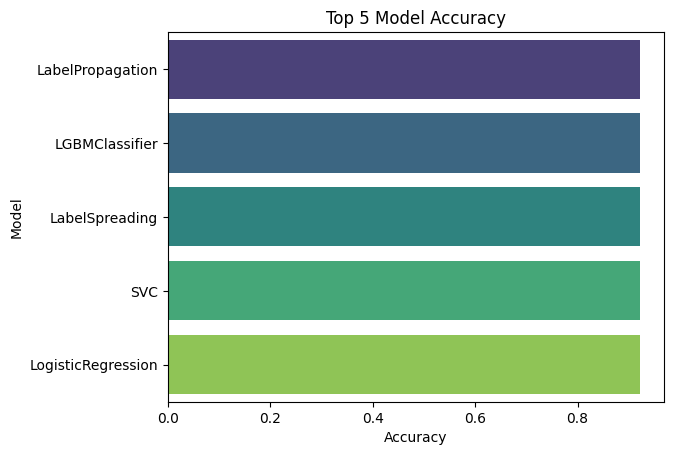

In [21]:
top_models = models.head(5).copy()
top_models.reset_index(inplace=True)
sns.barplot(data=top_models, x='Accuracy', y='Model', palette='viridis')
plt.title("Top 5 Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()